## word cloud

- https://www.tutorialspoint.com/create-word-cloud-using-python
    - Step 1: Read the data from the file and store it into ‘dataset’. 
    - Step 2: Create pixel array from the mask image. 
    - Step 3: Create the word cloud from the dataset. Set the background color, mask, and stop-words. 
    - Step 4: Store the final image into the disk. 
    
    
- http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know (for R) 

In [1]:
from PIL import Image

import re

import numpy as np
import seaborn as sns

from matplotlib import font_manager, rc

In [3]:
import pandas as pd
comments = pd.read_excel("data/네이버기사댓글.xlsx")
comments

,Unnamed: 0,0
0,0,신천지는? 왜 신천지는 말못하나
1,1,짱께 새끼들 입국하는거 막는게 그러케 어렵나 사람들이 점점 죽어가는게 눈에 안보이나
2,2,우리나라에서 살고 있는 내가 정말 부끄럽네요!이러니..후진국소리 듣나 싶군요.코로나...
3,3,말만하지말고 대책들을 세우세요
4,4,총선 미루려고 꼼수 쓰느라 일부러 중국놈들 불러서라도 한국에 코로나 퍼트린거면 죽을...
...,...,...
847,847,아니 중국 입국 왜 안막는지 최소한 답변이라도 해줘야될거 아님 청원 인원은 계속 올...
848,848,문재인간첩 문재인공산당 문재인여적죄 문재인 직권남용 문재인묵시적강요죄 문재인선거공...
849,849,한번도 경험해보지못한나라 공약 실천중인 문재앙씨
850,850,속뜻없는문재인 화법Q:삼겹살을 좋아하십니까?A:(눈알 7초 굴림) 삼겹살은 지방이 ...


In [4]:
comments = comments.drop(columns=['Unnamed: 0'])
comments.columns

Index([0], dtype='object')

In [5]:
comments.columns = ['댓글']
comments

,댓글
0,신천지는? 왜 신천지는 말못하나
1,짱께 새끼들 입국하는거 막는게 그러케 어렵나 사람들이 점점 죽어가는게 눈에 안보이나
2,우리나라에서 살고 있는 내가 정말 부끄럽네요!이러니..후진국소리 듣나 싶군요.코로나...
3,말만하지말고 대책들을 세우세요
4,총선 미루려고 꼼수 쓰느라 일부러 중국놈들 불러서라도 한국에 코로나 퍼트린거면 죽을...
...,...
847,아니 중국 입국 왜 안막는지 최소한 답변이라도 해줘야될거 아님 청원 인원은 계속 올...
848,문재인간첩 문재인공산당 문재인여적죄 문재인 직권남용 문재인묵시적강요죄 문재인선거공...
849,한번도 경험해보지못한나라 공약 실천중인 문재앙씨
850,속뜻없는문재인 화법Q:삼겹살을 좋아하십니까?A:(눈알 7초 굴림) 삼겹살은 지방이 ...


In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from konlpy.tag import Twitter
kka = Twitter()

C:\Users\hongs\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [15]:
comments['댓글'].head(1)

0    신천지는? 왜 신천지는 말못하나
Name: 댓글, dtype: object

In [16]:
kka_content_nouns = kka.nouns(''.join(str(comments['댓글'].fillna(''))))
kka_content_nouns

['신천지',
 '왜',
 '신천지',
 '짱',
 '새끼',
 '입국',
 '그러케',
 '사람',
 '점점',
 '눈',
 '안보',
 '우리나라',
 '살',
 '내',
 '정말',
 '후진국',
 '소리',
 '코로나',
 '말',
 '대책',
 '총선',
 '꼼수',
 '일부러',
 '중국',
 '놈',
 '한국',
 '코로나',
 '퍼트',
 '린거',
 '죽',
 '중국',
 '입국',
 '왜',
 '최소한',
 '답변',
 '청원',
 '인원',
 '계속',
 '문재인',
 '간첩',
 '문재인',
 '공산당',
 '문재인',
 '여적',
 '죄',
 '문재인',
 '직권남용',
 '문재인',
 '묵시',
 '강요죄',
 '문재인',
 '선거',
 '공',
 '한번',
 '경험',
 '한나라',
 '공약',
 '실천',
 '재앙',
 '속뜻',
 '문재인',
 '화법',
 '삼겹살',
 '눈알',
 '굴림',
 '삼겹살',
 '지방',
 '중국인',
 '유학생',
 '댓글']

In [17]:
def kka_nouns_wordcloud(content):
    kka_content_nouns = kka.nouns(''.join(str(results_df['댓글'].fillna(''))))
    displayWordCloud(' '.join(kka_content_nouns))

In [18]:
from collections import Counter
count = Counter(kka_content_nouns)
count

Counter({'신천지': 2,
         '왜': 2,
         '짱': 1,
         '새끼': 1,
         '입국': 2,
         '그러케': 1,
         '사람': 1,
         '점점': 1,
         '눈': 1,
         '안보': 1,
         '우리나라': 1,
         '살': 1,
         '내': 1,
         '정말': 1,
         '후진국': 1,
         '소리': 1,
         '코로나': 2,
         '말': 1,
         '대책': 1,
         '총선': 1,
         '꼼수': 1,
         '일부러': 1,
         '중국': 2,
         '놈': 1,
         '한국': 1,
         '퍼트': 1,
         '린거': 1,
         '죽': 1,
         '최소한': 1,
         '답변': 1,
         '청원': 1,
         '인원': 1,
         '계속': 1,
         '문재인': 7,
         '간첩': 1,
         '공산당': 1,
         '여적': 1,
         '죄': 1,
         '직권남용': 1,
         '묵시': 1,
         '강요죄': 1,
         '선거': 1,
         '공': 1,
         '한번': 1,
         '경험': 1,
         '한나라': 1,
         '공약': 1,
         '실천': 1,
         '재앙': 1,
         '속뜻': 1,
         '화법': 1,
         '삼겹살': 2,
         '눈알': 1,
         '굴림': 1,
         '지방': 1,
     

In [19]:
words = dict(count.most_common())
words

{'문재인': 7,
 '신천지': 2,
 '왜': 2,
 '입국': 2,
 '코로나': 2,
 '중국': 2,
 '삼겹살': 2,
 '짱': 1,
 '새끼': 1,
 '그러케': 1,
 '사람': 1,
 '점점': 1,
 '눈': 1,
 '안보': 1,
 '우리나라': 1,
 '살': 1,
 '내': 1,
 '정말': 1,
 '후진국': 1,
 '소리': 1,
 '말': 1,
 '대책': 1,
 '총선': 1,
 '꼼수': 1,
 '일부러': 1,
 '놈': 1,
 '한국': 1,
 '퍼트': 1,
 '린거': 1,
 '죽': 1,
 '최소한': 1,
 '답변': 1,
 '청원': 1,
 '인원': 1,
 '계속': 1,
 '간첩': 1,
 '공산당': 1,
 '여적': 1,
 '죄': 1,
 '직권남용': 1,
 '묵시': 1,
 '강요죄': 1,
 '선거': 1,
 '공': 1,
 '한번': 1,
 '경험': 1,
 '한나라': 1,
 '공약': 1,
 '실천': 1,
 '재앙': 1,
 '속뜻': 1,
 '화법': 1,
 '눈알': 1,
 '굴림': 1,
 '지방': 1,
 '중국인': 1,
 '유학생': 1,
 '댓글': 1}

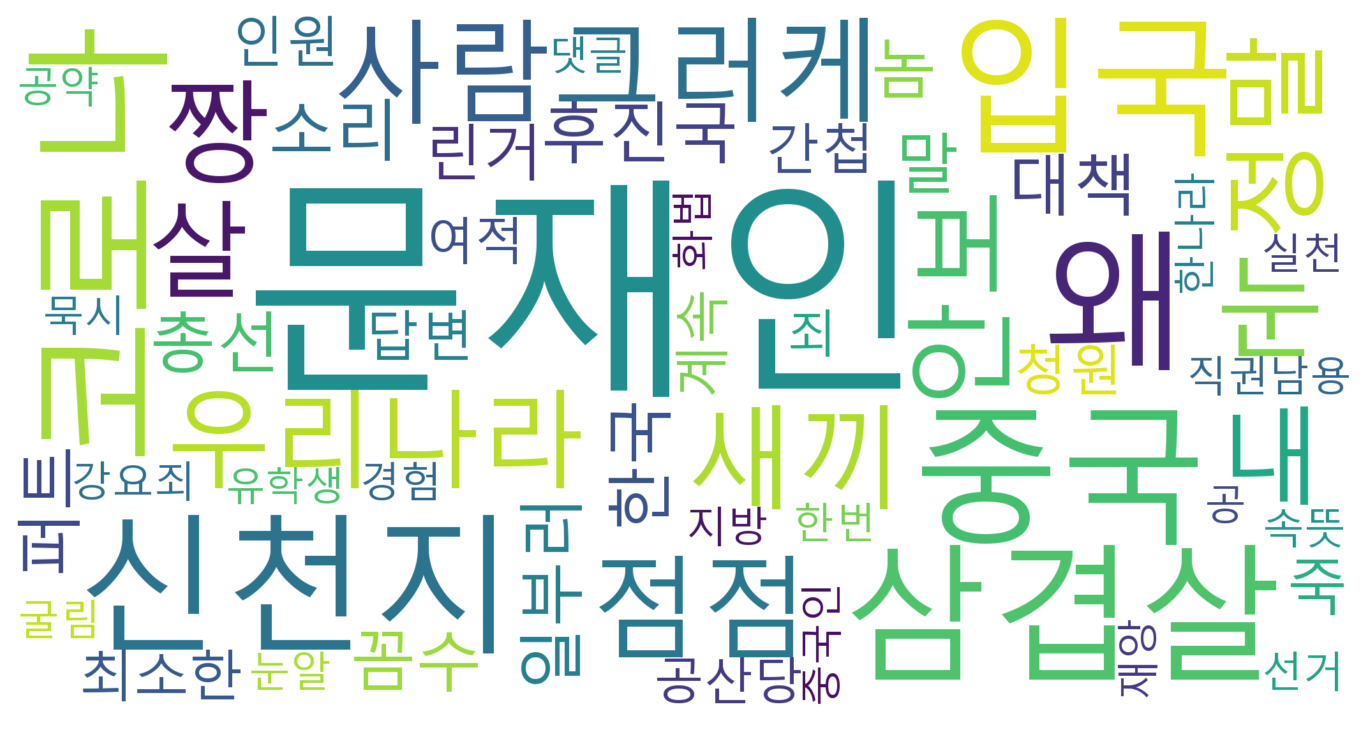

In [20]:
wordcloud2 = WordCloud(width=2100,
                       height=1100,
                       font_path='c:/Windows/Fonts/malgun.ttf',
                       background_color='white').generate_from_frequencies(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [31]:
mask = np.array(Image.open('map.png'))
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

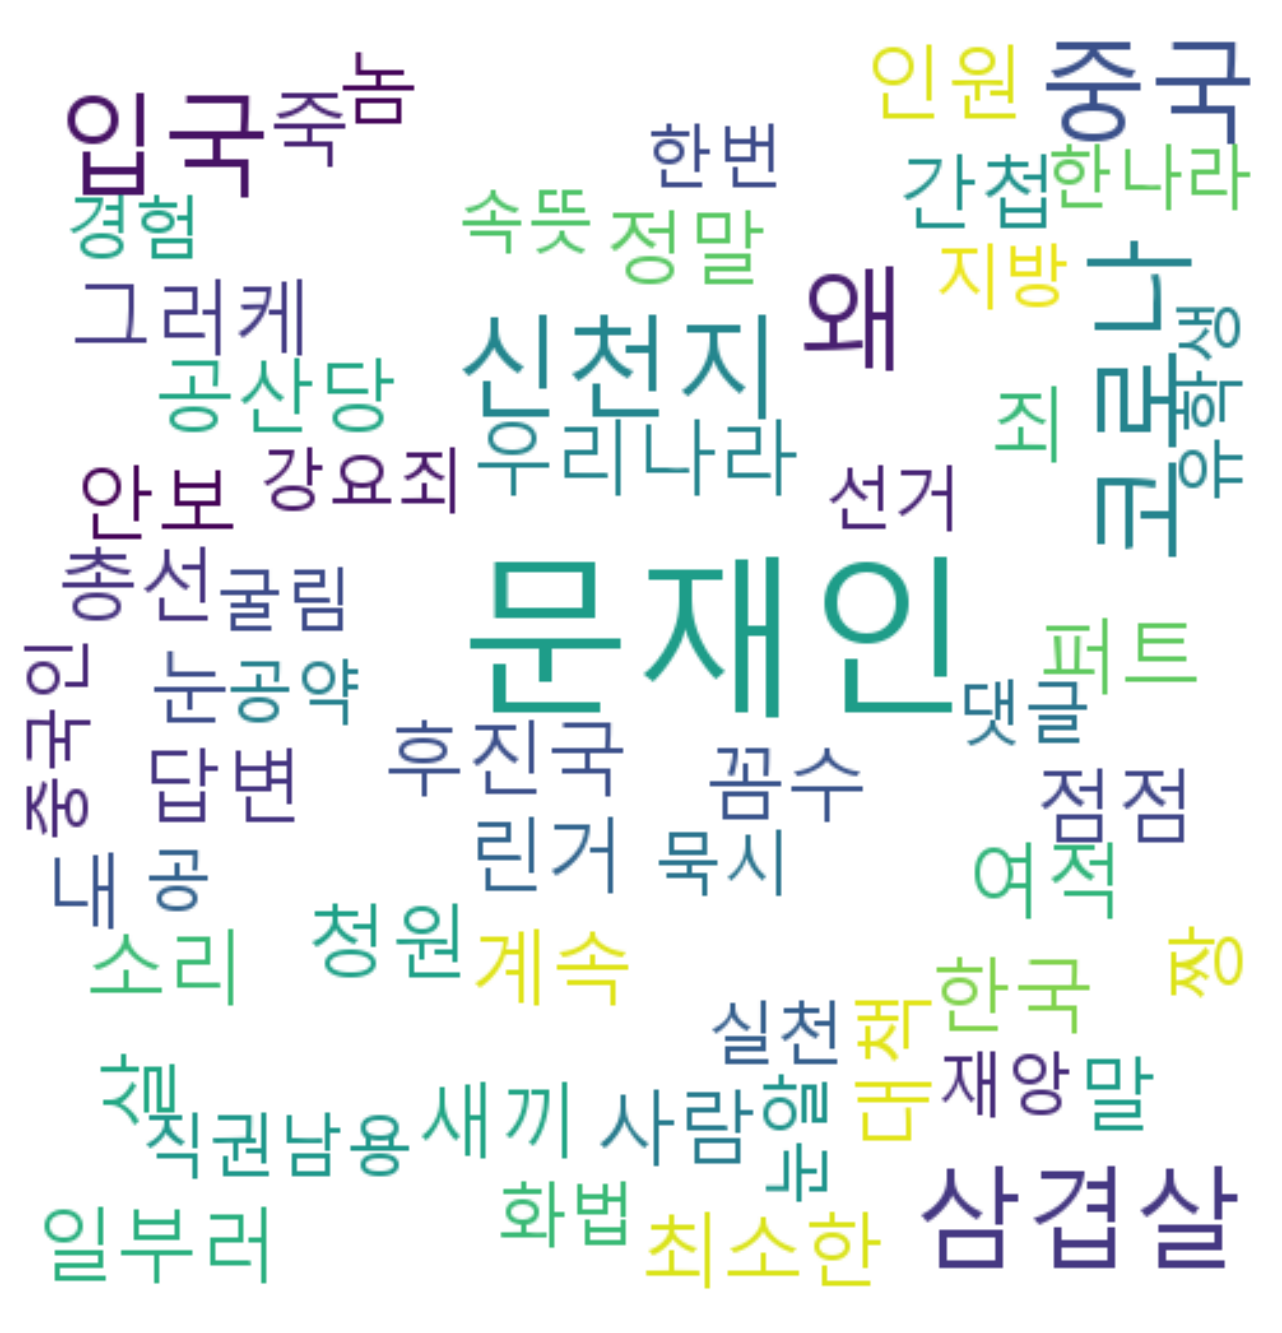

In [33]:
wordcloud3 = WordCloud(mask=mask,
                       font_path='c:/Windows/Fonts/malgun.ttf',
                       background_color='white').generate_from_frequencies(words)
wordcloud3

plt.figure(figsize=(12,12))
plt.imshow(wordcloud3,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [8]:
# from konlpy.tag import Twitter
# from collections import Counter

In [9]:
# def get_tags(text, ntags=50):
#     spliter = Twitter()
#     # konlpy의 Twitter객체
#     nouns = spliter.nouns(text)
#     # nouns 함수를 통해서 text에서 명사만 분리/추출
#     count = Counter(nouns)
#     # Counter객체를 생성하고 참조변수 nouns할당
#     return_list = []  # 명사 빈도수 저장할 변수
#     for n, c in count.most_common(ntags):
#         temp = {'tag': n, 'count': c}
#         return_list.append(temp)
#     # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
#     # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
#     # 명사와 사용된 갯수를 return_list에 저장합니다.
#     return return_list

In [10]:
# def main():
#     text_file_name = "out.txt"
#     # 분석할 파일
#     noun_count = 20
#     # 최대 많은 빈도수 부터 20개 명사 추출
#     output_file_name = "count.txt"
#     # count.txt 에 저장
#     open_text_file = open(text_file_name, 'r',-1,"utf-8")
#     # 분석할 파일을 open 
#     text = open_text_file.read() #파일을 읽습니다.
#     tags = get_tags(text, noun_count) # get_tags 함수 실행
#     open_text_file.close()   #파일 close
#     open_output_file = open(output_file_name, 'w',-1,"utf-8")
#     # 결과로 쓰일 count.txt 열기
#     for tag in tags:
#         noun = tag['tag']
#         count = tag['count']
#         open_output_file.write('{} {}\n'.format(noun, count))
#     # 결과 저장
#     open_output_file.close() 

In [11]:
# # 불용어 제거 
# # stopwords = []
# def displayWordCloud(data = None, backgroundcolor = 'black', width=1280, height=768):
#     wordcloud = WordCloud(
#                         font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
#                         stopwords = stopwords, 
#                         background_color = backgroundcolor, 
#                         width = width, height = height, 
#                         random_state=42).generate(data)
#     plt.figure(figsize = (15 , 10))
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()

In [21]:
# from nltk.tokenize import word_tokenize

In [23]:
# [i.split(" ") for i in text]